              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10013
           1       1.00      1.00      1.00      9987

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Epoch 1/25
563/563 [==============================] - 1s 1ms/step - loss: 0.5960 - accuracy: 0.7332
Epoch 2/25
563/563 [==============================] - 1s 1ms/step - loss: 0.2550 - accuracy: 0.9548
Epoch 3/25
563/563 [==============================] - 1s 1ms/step - loss: 0.1376 - accuracy: 0.9702
Epoch 4/25
563/563 [==============================] - 1s 1ms/step - loss: 0.0996 - accuracy: 0.9759
Epoch 5/25
563/563 [==============================] - 1s 1ms/step - loss: 0.0806 - accuracy: 0.9775
Epoch 6/25
563/563 [==============================] - 1s 1ms/step - loss: 0.0691 - accuracy: 0.9778
Epoch 7/25
563/563 [==============================] - 1s 1ms/step - loss:

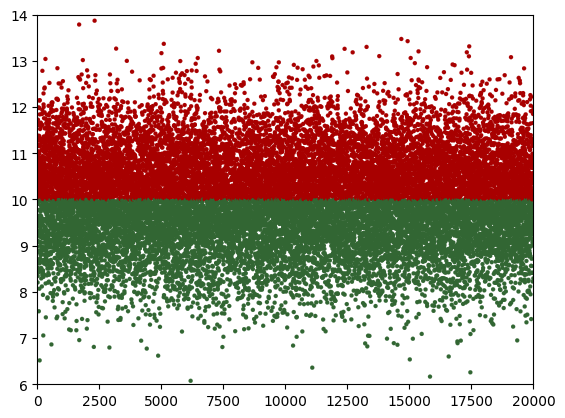

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

x1tlaky = np.random.randn(20000) + 10
yLabels = []
colors = []

for num in x1tlaky:
    if num > 10:
        yLabels.append(0)
        colors.append('#A80000')
    else:
        yLabels.append(1)
        colors.append('#326633')

xdata = np.arange(0, 20000)
ydata = x1tlaky
plt.xlim([0, 20000])
plt.ylim([6, 14])
plt.scatter(xdata, ydata, marker='.', linewidths=0.1, c=colors)

d = {'tlaky[p]': x1tlaky, 'labely': yLabels}
do = pd.DataFrame(data=d)
do.to_csv('datavylisku.csv')

x1tlakyTwoDim = x1tlaky.reshape(-1, 1)
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x1tlakyTwoDim, yLabels)
y = model.predict_proba([[13]])

print(classification_report(yLabels, model.predict(x1tlakyTwoDim)))

x1tlakyTwoDimList = x1tlakyTwoDim.tolist()
X_train, y_train = x1tlakyTwoDimList[:18000], yLabels[:18000]
X_test, y_test = x1tlakyTwoDimList[18000:], yLabels[18000:]

tf.random.set_seed(42)
model_4 = tf.keras.Sequential([

                               tf.keras.layers.Dense(4, activation = 'relu'), #we may right it "tf.keras.activations.relu" too

                               tf.keras.layers.Dense(4, activation = 'relu'),

                               tf.keras.layers.Dense(1, activation = 'sigmoid')

])
model_4.compile( loss= tf.keras.losses.binary_crossentropy,

                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),

                metrics = ['accuracy'])
model_4.fit(X_train, y_train, epochs = 25, verbose = 1)

loss, accuracy = model_4.evaluate(X_test, y_test)
print(f' Model loss on the test set: {loss}')
print(f' Model accuracy on the test set: {100*accuracy}')

print('ahoj')



